# 导入工具

In [77]:
# data analysis
import pandas as pd 
import numpy as np
import math

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import warnings
warnings.filterwarnings(action='ignore')


# 导入数据

In [2]:
data = pd.read_csv('./archive/winequality-red.csv')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 数据缺失值查询

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
 (data.shape[0] - data.count())/data.shape[0]

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [7]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

每列中均无缺失值

# 数据异常值查询

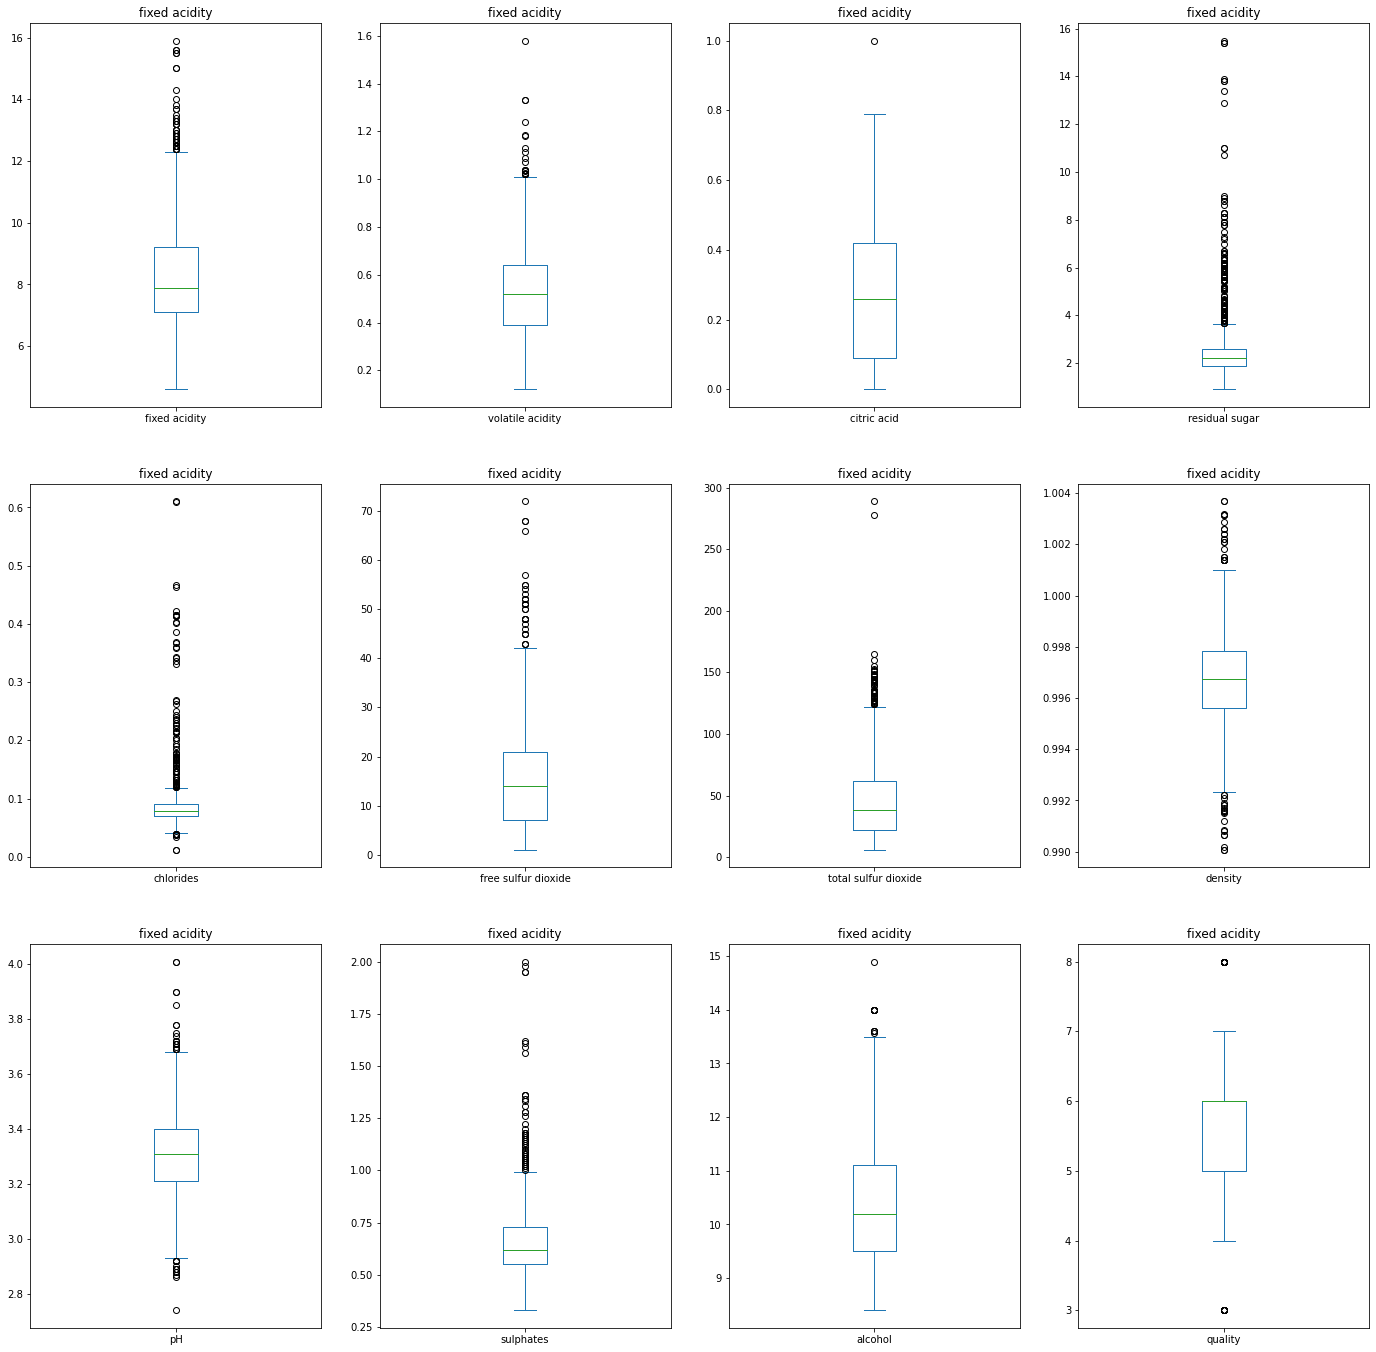

In [8]:
n_rows=3
n_cols=4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(24,24))
for i, column in enumerate(data.columns):
    data[column].plot.box(title='fixed acidity',ax=axes[i//n_cols,i%n_cols])

fixed acidity，volatile acidity，residual sugar，free sulfur dioxide，total sulfur dioxide，sulphates，alcohol的异常值集中在较大值的一边，说明分布成右偏态。

chlorides，density,pH的异常值较大值和较小值均存在，说明分布的尾部较长，不符合正态分布。

#### 对于异常值，我们选择将其视为缺失值，使用每个属性的正常值训练模型对缺失值进行预测并填补。

Text(0, 0.5, 'count')

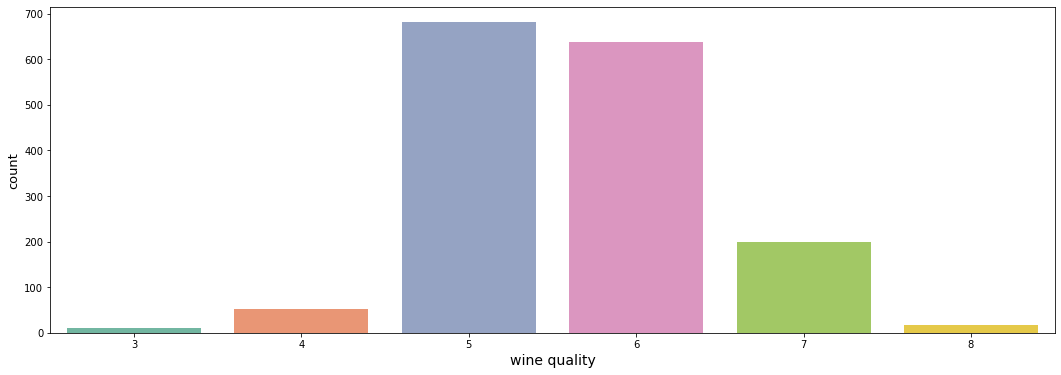

In [9]:
plt.figure(figsize = (18,6))
ax1 = sns.countplot(x='quality',data = data,palette = 'Set2')
plt.xlabel('wine quality',fontsize = 14)
plt.ylabel('count',fontsize= 13)

输出值quality的分布很不均衡。

# 异常值处理

In [10]:
outlier_list = list(data.columns)
def outlier_process(j):
    # 导入工具
    from sklearn.ensemble import RandomForestRegressor as rfr
    # 读取数据
    data = pd.read_csv('./archive/winequality-red.csv')
    # 异常值（极值、空值）处理
    data = data.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
    
    # 计算IQR
    a,b=data[j].quantile([0.25,0.75])
    IQR=b-a
    data_fill = data[j]
    
    # 获取异常值索引,使用NAN替换异常值
    outlier = data_fill[(data_fill<(a-1.5*IQR)) | (data_fill>(b+1.5*IQR))].index
    for i in outlier:
        data_fill.iloc[i,:]=np.nan
    fill_fixed = data_fill.copy()

    # 选取该特征外的其他特征和新标签
    df = data.loc[:,data.columns!=j]

    # 找出训练集和测试集
    Ytrain = fill_fixed[fill_fixed.notnull()]#特征中不缺失的值
    Ytest = fill_fixed[fill_fixed.isnull()]#特征中缺失的值
    Xtrain = df.iloc[Ytrain.index,:]#特征不缺失的值对应其他N-1个特征+原本的标签
    Xtest = df.iloc[Ytest.index,:]#特征缺失的值对应其他N-1个特征+原本的标签

    Xtrain = Xtrain.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
    Ytrain = Ytrain.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
    # 用随即森林回归来填补缺失值
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain,Ytrain)
    Ypredict = rfr.predict(Xtest)
    
    # 替换异常值
    fill_fixed[fill_fixed.isnull()] = Ypredict
    return fill_fixed

In [11]:
for i in range(11):
    data.iloc[:,i] = outlier_process(outlier_list[i])

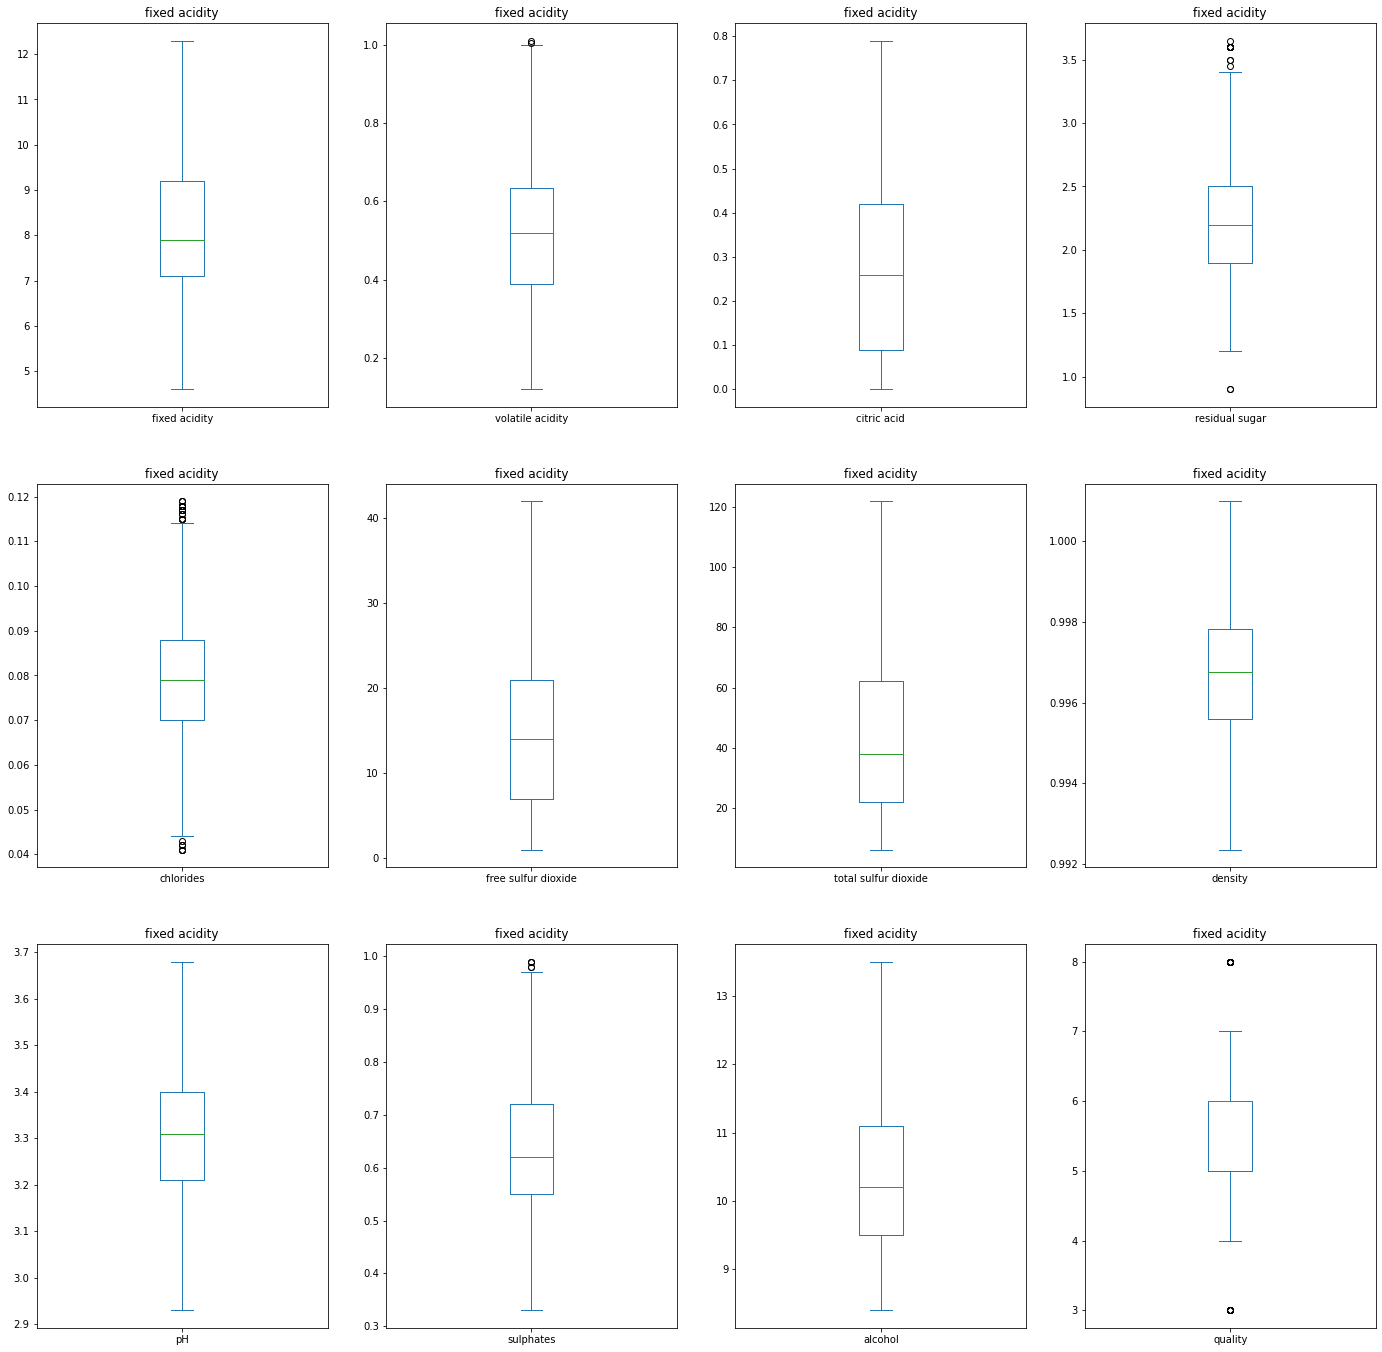

In [12]:
n_rows=3
n_cols=4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(24,24))
for i, column in enumerate(data.columns):
    data[column].plot.box(title='fixed acidity',ax=axes[i//n_cols,i%n_cols])
    

此时数据的11个特征的异常值基本处理完成。

# 数据分布观察

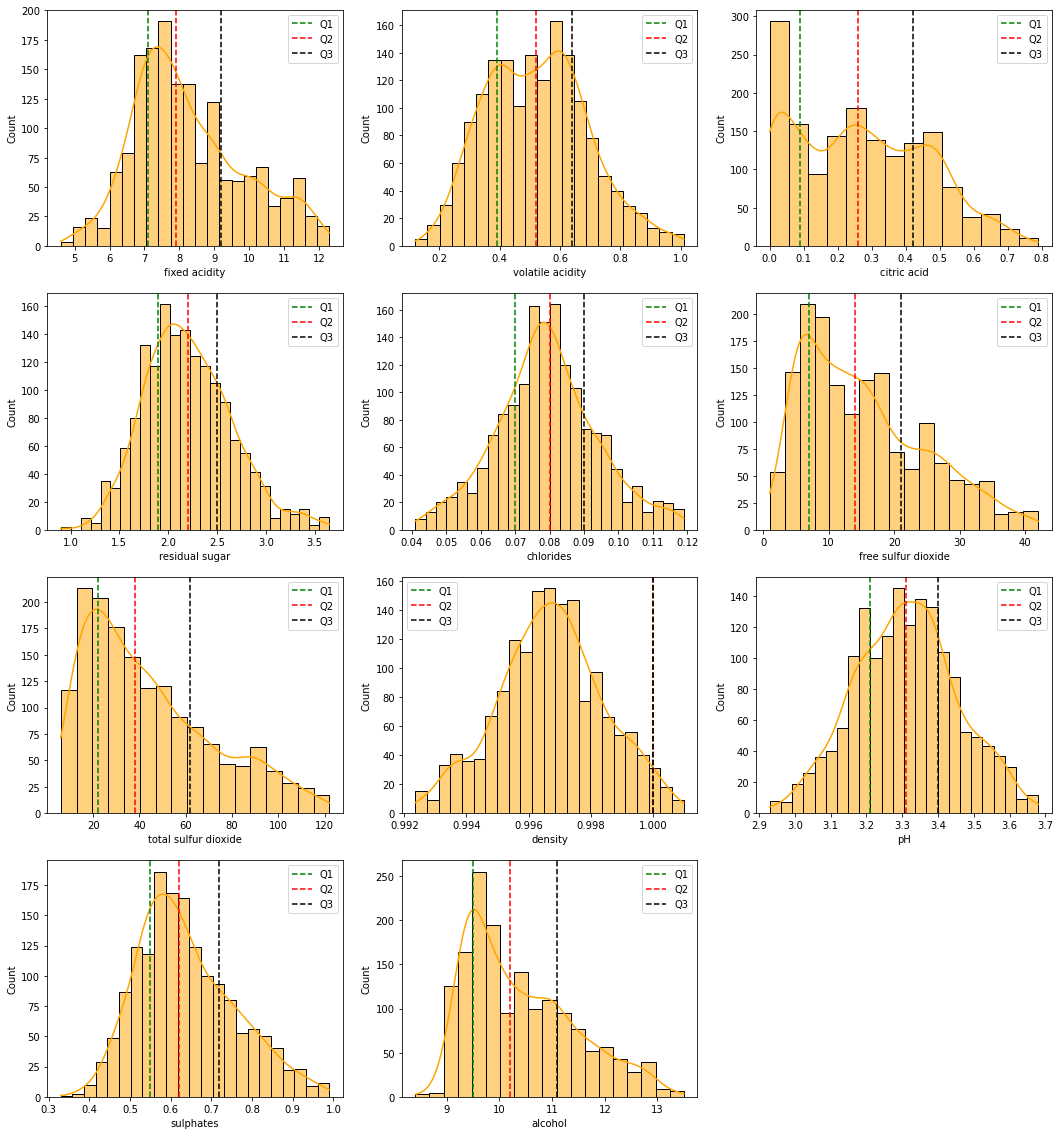

In [28]:
feature_ = data.columns[:-1]
def get_percentile(feature,q_range):
    dist = data[feature].describe()[str(q_range) + '%']
    return round(dist,2)
def render_counterplot():
    fig = plt.figure(figsize = (18,20))
    for column, feature in enumerate(feature_):
        fig.add_subplot(4,3,column +1)
        q1 = get_percentile(feature,25)
        q2 = get_percentile(feature,50)
        q3 = get_percentile(feature,75)
        sns.histplot(data = data,x = feature,kde = True,color ='orange')
        plt.axvline(q1,linestyle = '--',color='green',label = 'Q1')
        plt.axvline(q2,linestyle = '--', color = 'red' , label = 'Q2')
        plt.axvline(q3,linestyle = '--',color = 'black',label='Q3')
        plt.legend()
    plt.show()
render_counterplot()

从上述图表可以看出，特征如'citric acid','free sulfur dioxide','total sulfur dioxide','alcohol'的分布呈现偏移的状态，不符合正态分布。

In [29]:
# n_rows=4
# n_cols=3
# fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(24,24))

# for i, column in enumerate(data.columns):
#     sns.kdeplot(data[column], ax=axes[i//n_cols,i%n_cols])

#  特征处理
## 特征选择
### 1. 热力图 —— 自变量和自变量的相关性检验


In [14]:
# 筛选只包含特征的数据
heat_data = data.loc[:,data.columns != 'quality']
heat_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [15]:
# 计算各特征之间的相关系数
corr = heat_data.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.274582,0.678027,0.281808,0.248801,-0.161667,-0.119335,0.655369,-0.687819,0.217031,-0.069345
volatile acidity,-0.274582,1.000000,-0.572675,0.024266,0.146332,-0.009371,0.093247,0.017131,0.236092,-0.337423,-0.217779
citric acid,0.678027,-0.572675,1.000000,0.195796,0.119377,-0.060032,0.009334,0.366022,-0.549904,0.300159,0.116617
residual sugar,0.281808,0.024266,0.195796,1.000000,0.264352,0.030089,0.126168,0.447429,-0.087509,0.080383,0.096857
chlorides,0.248801,0.146332,0.119377,0.264352,1.000000,0.000369,0.130473,0.435410,-0.245780,-0.029667,-0.311895
free sulfur dioxide,-0.161667,-0.009371,-0.060032,0.030089,0.000369,1.000000,0.677380,-0.037970,0.083859,0.038380,-0.069812
total sulfur dioxide,-0.119335,0.093247,0.009334,0.126168,0.130473,0.677380,1.000000,0.109033,-0.029590,-0.051117,-0.241362
density,0.655369,0.017131,0.366022,0.447429,0.435410,-0.037970,0.109033,1.000000,-0.323303,0.140626,-0.501278
pH,-0.687819,0.236092,-0.549904,-0.087509,-0.245780,0.083859,-0.029590,-0.323303,1.000000,-0.043239,0.184422
sulphates,0.217031,-0.337423,0.300159,0.080383,-0.029667,0.038380,-0.051117,0.140626,-0.043239,1.000000,0.221495


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'fixed acidity'),
  Text(0, 1.5, 'volatile acidity'),
  Text(0, 2.5, 'citric acid'),
  Text(0, 3.5, 'residual sugar'),
  Text(0, 4.5, 'chlorides'),
  Text(0, 5.5, 'free sulfur dioxide'),
  Text(0, 6.5, 'total sulfur dioxide'),
  Text(0, 7.5, 'density'),
  Text(0, 8.5, 'pH'),
  Text(0, 9.5, 'sulphates'),
  Text(0, 10.5, 'alcohol')])

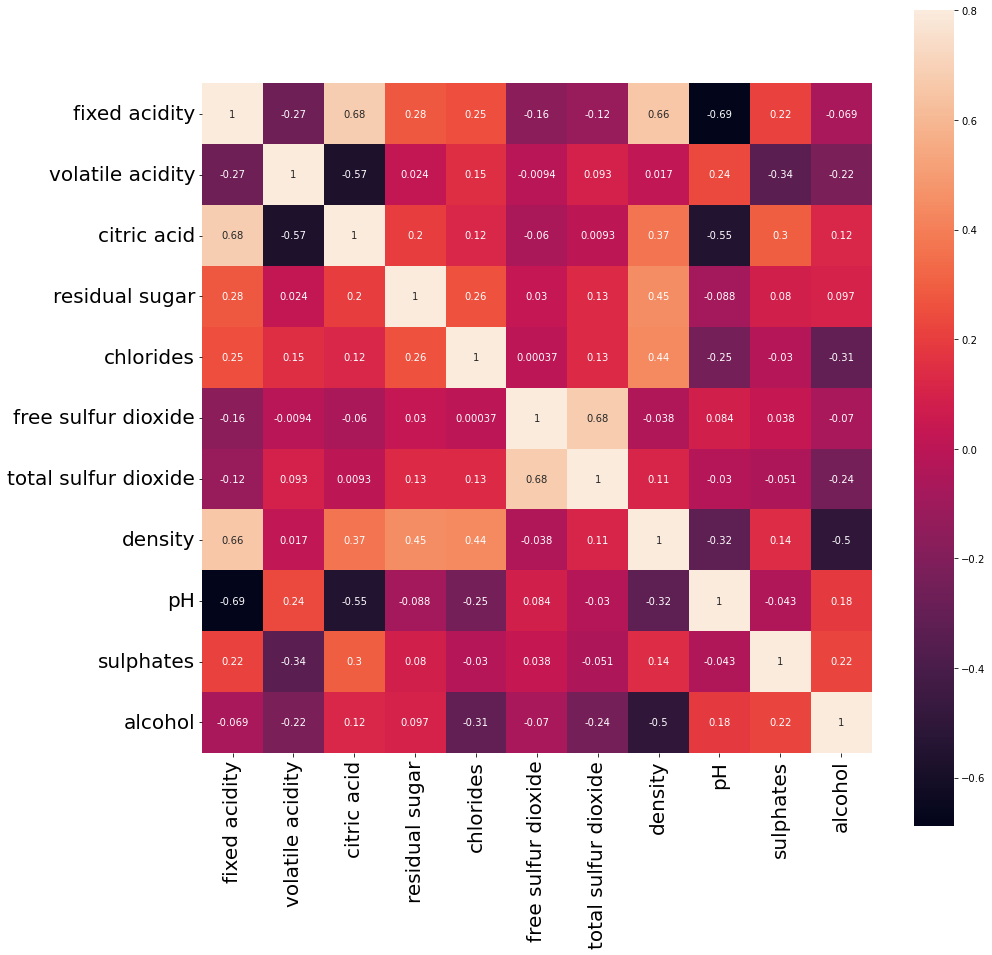

In [99]:
# 针对相关系数生成热力图
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax=.8, square=True, annot=True)
# 设置刻度字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#### 1.  热力图右侧的刻度展示了不同相关系数对应的颜色深浅，越靠近浅色相关性越强。
#### 2. 从图中可以看出，以下各组相关性都较高，即存在很强的多重共线性。
**fixed acidity** ：citric acid、density

**free sulfur dioxide**：total sulfur dioxide

**residual sugar**：density

**chlorides**：density
#### 综上，考虑删去density特征，从free sulfur dioxide和total sulfur dioxide中选择一个变量，从fixed acidity和citric acid中选择一个变量，以免导致因多重共线性造成的过拟合。

### 2. 特征重要性分析

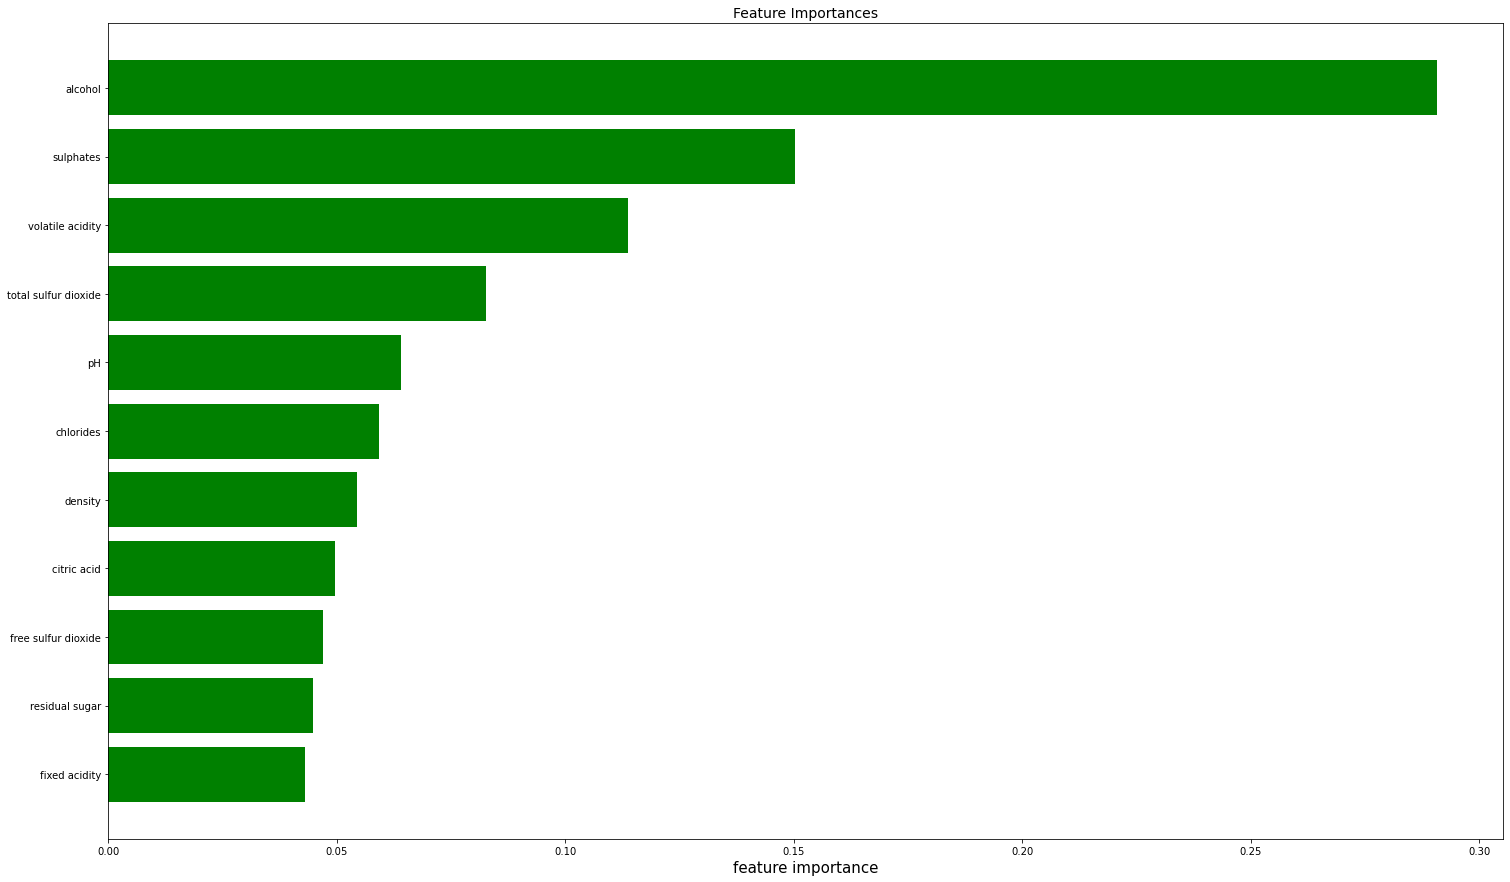

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=1,max_depth =12)
x = data.drop(['quality'],axis=1)
rf.fit(x,data.quality)

# 存储特征的名称及其重要性数值
features = data.columns
importances = rf.feature_importances_
sorted_index = np.argsort(importances)[:]
plt.figure(figsize = (25,15))
plt.title('Feature Importances',fontsize = 14)
plt.barh(range(len(sorted_index)),importances[sorted_index],color = 'green', align= 'center')
plt.yticks(range(len(sorted_index)),[features[i] for i in sorted_index])
plt.xlabel('feature importance', fontsize=15)
plt.show()

综合热力图和重要性数值的结果，考虑删去特征'density'，'free sulfur dioxide'，'fixed acidity'。

## 筛选特征

In [37]:
data_clean = data.drop(['density','free sulfur dioxide','fixed acidity'], axis=1)
data_clean

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.700,0.00,1.9,0.076,34.0,3.51,0.56,9.4,5
1,0.880,0.00,2.6,0.098,67.0,3.20,0.68,9.8,5
2,0.760,0.04,2.3,0.092,54.0,3.26,0.65,9.8,5
3,0.280,0.56,1.9,0.075,60.0,3.16,0.58,9.8,6
4,0.700,0.00,1.9,0.076,34.0,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,2.0,0.090,44.0,3.45,0.58,10.5,5
1595,0.550,0.10,2.2,0.062,51.0,3.52,0.76,11.2,6
1596,0.510,0.13,2.3,0.076,40.0,3.42,0.75,11.0,6
1597,0.645,0.12,2.0,0.075,44.0,3.57,0.71,10.2,5


# 平衡数据集

In [38]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

从中可以看出Label输出值非常不平衡，这会造成模型对占比多的quality过拟合，对占比少的quality欠拟合。

In [39]:
from imblearn.over_sampling import SMOTE

x = data_clean.drop('quality',axis='columns')
y =  data_clean['quality']
smote = SMOTE(sampling_strategy = 'auto')
x_sm,y_sm = smote.fit_resample(x,y)

In [40]:
y_sm.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

# 特征数据归一化
归一化处理使得经过处理的数据符合标准正态分布，即均值为0，标准差为1，对提高模型的精度有帮助。

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_sm[x_sm.columns] = scaler.fit_transform(x_sm[x_sm.columns])

In [42]:
x_sm

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol
0,0.812896,-1.384697,-0.744407,-0.029666,-0.077761,1.379124,-0.673289,-1.147908
1,1.785279,-1.384697,0.895351,1.700904,1.226520,-0.899119,0.337795,-0.787937
2,1.137024,-1.182575,0.192598,1.228930,0.712712,-0.458169,0.085024,-0.787937
3,-1.455999,1.445008,-0.744407,-0.108328,0.949854,-1.193086,-0.504775,-0.787937
4,0.812896,-1.384697,-0.744407,-0.029666,-0.077761,1.379124,-0.673289,-1.147908
...,...,...,...,...,...,...,...,...
4081,-1.007965,0.138636,-0.909871,-0.394881,-0.443982,-0.615943,0.580535,0.638735
4082,-0.863603,0.344496,-0.687651,-0.079309,-0.495541,-0.621919,0.496697,0.857268
4083,-1.066256,0.766188,2.332924,0.060130,-0.069462,0.029758,1.565093,1.641451
4084,-0.342554,0.644536,0.029935,-0.181056,-0.764876,-0.870831,0.577528,1.973989


In [43]:
y_sm

0       5
1       5
2       5
3       6
4       5
       ..
4081    8
4082    8
4083    8
4084    8
4085    8
Name: quality, Length: 4086, dtype: int64

# 数据集划分


# 模型建立——1.线性回归

In [75]:
# 将原数据的75%划分为训练集，25%划分为测试集
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size = 0.25,random_state = 42)

In [67]:
# 线性回归模型训练
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [68]:
# 输出截距和权重系数
print("截距：",lr.coef_)
print("权重系数：",lr.intercept_)

截距： [-0.65548048 -0.29712042 -0.01338165 -0.03093417  0.08124465 -0.48460117
  0.40236566  0.78789289]
权重系数： 5.488194372771635


## 模型评估
**对于多元线性回归模型的评估，主要有四种指标，这里我选用了RMSE——均方差根，数值越小说明模型拟合度越高。**

In [71]:
y_pred = lr.predict(x_test)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print("MSE:",MSE)
print("RMSE:",RMSE)

MSE: 0.893969719614592
RMSE: 0.9454997195211599


**模型拟合度可视化：查看模型预测的结果和真实值之间的差异：**

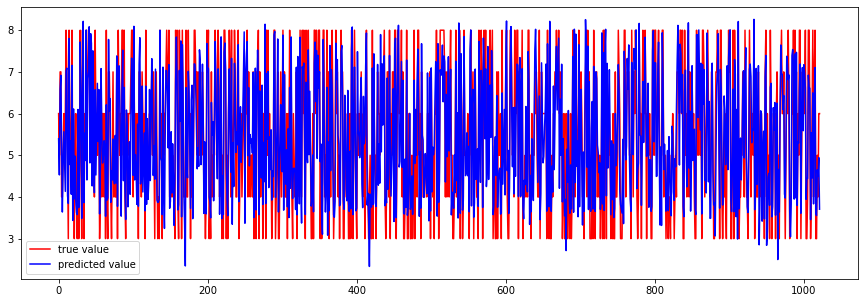

In [73]:
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)), y_test, 'r', label='true value')
plt.plot(range(len(y_test)), y_pred, 'b', label='predicted value')
plt.legend()

从图中可以看出，大部分红线超出蓝色线，说明模型拟合度不够好。

**模型拟合度可视化：通过散点图直观展现拟合效果：**

Text(0, 0.5, 'predicted value')

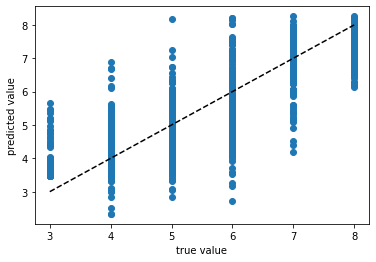

In [74]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.xlabel('true value')
plt.ylabel('predicted value')

#### 综上可以发现，线性回归模型不适合应用于本数据集，其他监督学习分类算法更合适。

# 模型建立——2. KNN

In [76]:
# 将原数据的75%划分为训练集，25%划分为测试集
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size = 0.25,random_state = 42)

**k值的选择**

k太小，不具有抗干扰性;

k太大，不具有代表性，相当于用较大邻域中的训练实例进行预测，学习的近似误差会增大。

所以，经验来说：一般k的取值不超过20，上限是n的开方，随着数据集的增大，K的值也要增大。

In [78]:
# KNN模型训练
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [80]:
# 预测新数据
pre_knn= knn.predict(x_test)
pre_knn

array([6, 6, 7, ..., 4, 6, 4], dtype=int64)

## 模型评估
knn分类有2个重要的参数：邻居个数和数据点之间距离的度量方法。在实践中，使用较小的奇数个邻居，比如，3和5，往往可以得到比较好的结果，但是还应该根据实际情况来调节参数。

### 模型的正确率
使用模型的score()函数，使用测试集进行评分，分数越高，模型越好。

In [88]:
assess_model_socre=knn.score(x_test,y_test)
print('Accuracy of KNN:',assess_model_socre)

Accuracy of KNN: 0.8228962818003914


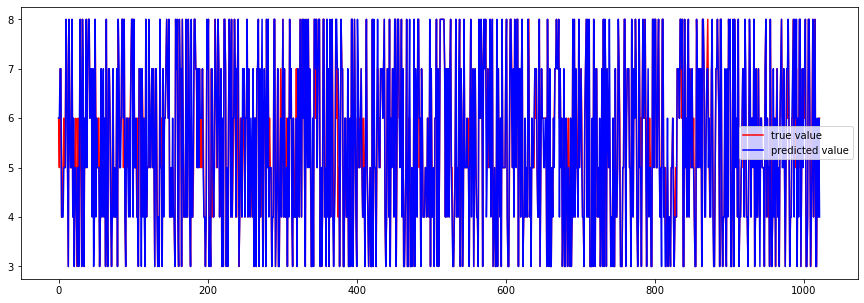

In [82]:
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)), y_test, 'r', label='true value')
plt.plot(range(len(y_test)), pre_knn, 'b', label='predicted value')
plt.legend()

In [91]:
int(np.sqrt(3064))

55

### 邻居个数选择
使用枚举法，逐个测试邻居的个数，并根据模型的score()函数查看模型的正确率。

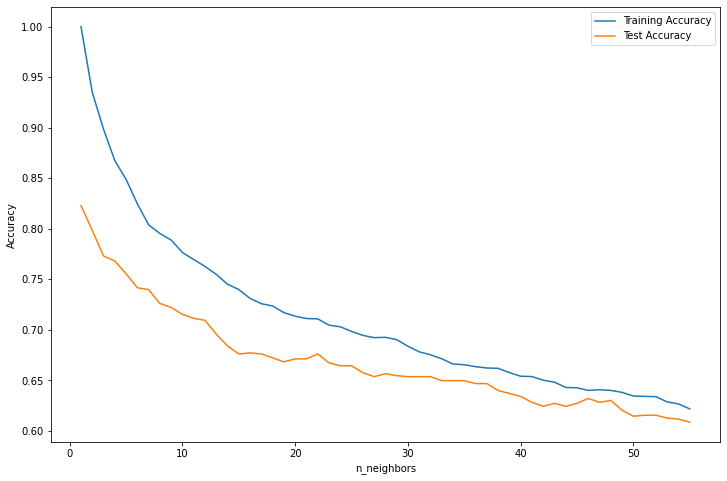

In [113]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# 划分数据集
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size = 0.25,random_state = 42)

training_accuracy=[]
test_accuracy=[]

neighbors_settings=range(1,int(np.sqrt(x_train.shape[0]))+1)

for n_neighbors in neighbors_settings:
    knn=KNeighborsClassifier(n_neighbors)
    knn.fit(x_train,y_train)
    training_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

plt.figure(figsize=(12,8))
plt.plot(neighbors_settings,training_accuracy,label='Training Accuracy')
plt.plot(neighbors_settings,test_accuracy,label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

### 超参数调优——网格搜索（Grid Search）

In [107]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# 划分数据集
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size = 0.25,random_state = 42)

# 网格搜索调优
knn = KNeighborsClassifier()

param = {"n_neighbors": [i for i in range(1,55)]}

gc = GridSearchCV(knn, param_grid=param, cv=10)

gc.fit(x_train, y_train)

print("Accuracy of KNN_GridSearch：", gc.score(x_test, y_test))

# 训练验证集的结果
print("在交叉验证当中验证的最好结果：", gc.best_score_)
print("gc选择的模型K值是：", gc.best_estimator_)
#print("每次交叉验证的结果为：", gc.cv_results_)
pprint(gc.cv_results_)

Accuracy of KNN_GridSearch： 0.8228962818003914
在交叉验证当中验证的最好结果： 0.8492197313235825
gc选择的模型K值是： KNeighborsClassifier(n_neighbors=1)
{'mean_fit_time': array([0.0020066 , 0.00442584, 0.00312467, 0.00065081, 0.00312481,
       0.00156295, 0.00327098, 0.00269969, 0.00286906, 0.00359652,
       0.00301216, 0.0021894 , 0.        , 0.00156233, 0.00316381,
       0.00077062, 0.0035861 , 0.0046859 , 0.00261371, 0.00311835,
       0.00210822, 0.00280657, 0.00155075, 0.00555973, 0.00250239,
       0.00156236, 0.00156257, 0.00156317, 0.00246365, 0.00189853,
       0.00457284, 0.00448315, 0.00196707, 0.00312467, 0.00437524,
       0.00219266, 0.00403981, 0.00180595, 0.00100005, 0.00412538,
       0.00120096, 0.00312464, 0.00675585, 0.00123153, 0.        ,
       0.        , 0.00065942, 0.00136003, 0.00020854, 0.00018353,
       0.00070837, 0.        , 0.00090065, 0.00932992]),
 'mean_score_time': array([0.00800266, 0.00498786, 0.00628889, 0.00876281, 0.00936368,
       0.00789762, 0.00932813, 0.00899

### 提升准确率的稳定性——多次计算求平均值
由于算法相同，但训练集是随机生成的，因此模型的准确率不够稳定。为得到稳定的算法准确度，这里采用**多次计算求平均值**的做法。

In [114]:
def knn_model(x,y):
    
    # 划分数据集
    x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size = 0.25,random_state = 42)
    
    knn=KNeighborsClassifier(n_neighbors=1)
    knn.fit(x_train,y_train)
    return knn.score(x_test,y_test)

In [115]:
# 多次运算求取平均值
def score_avg():
    num=5000
    score_sum=0
    a=[]
    b=[]
    for i in range(1,num+1):
        score_sum += knn_model(x_sm,y_sm)
        # 每10次查看一下准确率
        if i%10==0:
            score_ave = score_sum/(i)
            a.append(i)
            b.append(score_ave)
    # 获取最终的准确率
    print(score_ave)
    # 将准确率变化过程展示出来
    plt.plot(a,b)
    plt.grid()
    plt.show()

0.8228962818003307


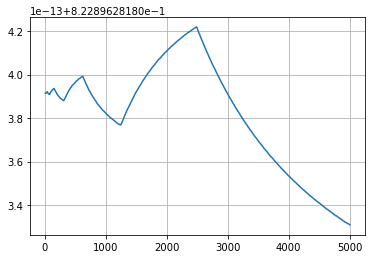

In [116]:
score_avg()

可以看到随着迭代次数的增多，准确率呈现先增后减的趋势，最后稳定在82.2%附近。

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# 总结：本项目主要包括以下步骤：
## 1. 数据观察
本数据集一共包含1599条数据，其中包含11个不同的特征值，1个输出值Label。通过观察，本数据集无缺失值，但异常值较多。
## 2. 数据异常值处理
使用随机森林回归算法，将正常值视为训练数据，根据异常值的其他特征值来预测并替换异常值。
## 3. 特征处理及选择
#### ① 热力图
通过计算11个特征值之间的相关性系数生成热力图，从中可以获取特征之间的共线性和相关性。
#### ② 特征重要性排序
### 根据以上两个图表，对特征进行筛选，去除相关性较大的特征。
## 4. 模型训练及参数优化
### ① 线性回归
考虑到预测输出值为连续型数值，尝试线性回归模型拟合数据。通过预测结果和真实值的对比，放弃改模型。
### ② KNN
本数据包含Label，属于监督学习，尝试KNN模型。

通过尝试不同的neighbor数值，选择使得模型准确率最高的k值（k=1）。

通过网格搜索对KNN模型进行超参数调优，准确率并无明显提升。

通过多次随机划分训练集和测试集并计算平均模型准确率，得出模型的稳定准确率：82.2%。